In [ ]:

!pip install demucs

In [ ]:
import torch
import torchaudio
from demucs import pretrained
from demucs.apply import apply_model

In [ ]:
model = pretrained.get_model("htdemucs")

# Load audio
wave, sr = torchaudio.load("exp 1.mp3")

# Apply noise reduction
sources = apply_model(model, wave[None])

# Save only the "noise" component (removing speech)


In [ ]:
torchaudio.save("exp1_cleaned.wav", sources[0, 0], sr)

In [ ]:
import torchaudio.functional as F

# Load welding sound
wave, sr = torchaudio.load("exp1_cleaned.wav")



# Apply bandpass filter (1kHz - 20kHz)
filtered_wave= F.bandpass_biquad(wave,sr,central_freq= 1000, Q= 0.7)

In [ ]:
filtered_wave.shape

torch.Size([2, 8233911])

In [ ]:
torchaudio.save("exp1_cleaned_biquad.wav", filtered_wave, sr)

In [ ]:
import librosa

In [ ]:
y,sr= librosa.load('exp1_cleaned_biquad.wav')

In [ ]:
y.shape,sr

((4116956,), 22050)

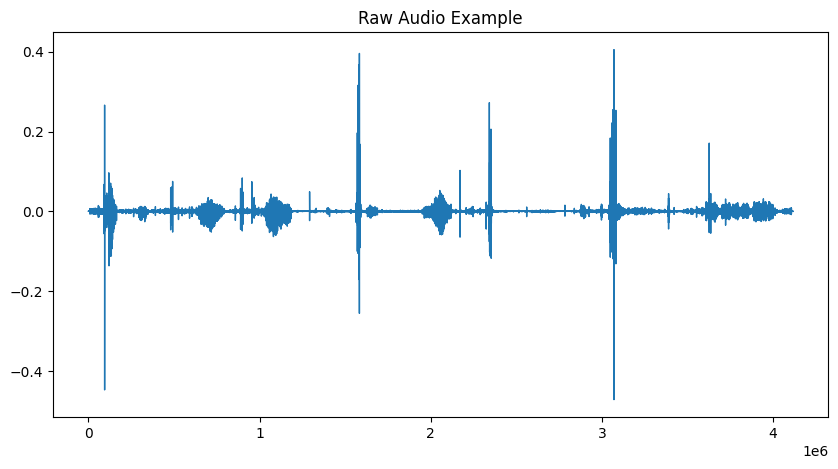

In [ ]:
pd.Series(y).plot(figsize= (10,5),lw=1,title = 'Raw Audio Example')
plt.show()

In [ ]:
y_trimmed,_ = librosa.effects.trim(y, top_db=10)

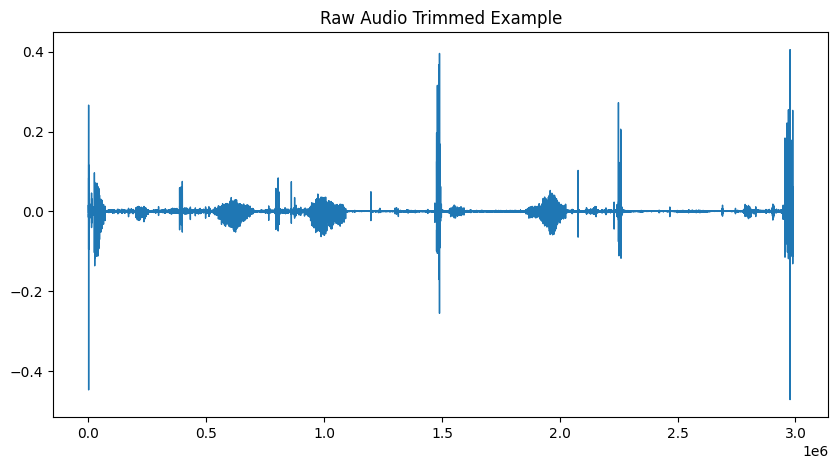

In [ ]:
pd.Series(y_trimmed).plot(figsize= (10,5),lw=1,title = 'Raw Audio Trimmed Example')
plt.show()

In [ ]:
import soundfile as sf

In [ ]:
sf.write("output.wav", y_trimmed, sr)

In [ ]:
import IPython.display as ipd

In [ ]:
ipd.Audio('output.wav')